# Conceptos Clave

### MSE (Métricas de error):

Te ayuda a entender cuánto se equivoca el modelo, en promedio.

Si estás ajustando diferentes modelos o probando diferentes configuraciones, comparar el MSE te permite elegir el modelo más preciso.

Si el MSE es bajo, significa que las predicciones del modelo son bastante cercanas a los puntajes reales.

### Valores de R²:

𝑅2 = 1: El modelo predice perfectamente los valores observados.

𝑅2 = 0: El modelo no explica nada de la variabilidad de los datos.

𝑅2 < 0: El modelo es peor que simplemente usar la media de los datos para predecir.

### Interpretación de R²:

Representa la proporción de la variabilidad en la variable dependiente (𝑦) que el modelo es capaz de explicar. Por ejemplo:

Si 𝑅2 = 0.85, significa que el 85% de la variabilidad en los datos es explicada por el modelo, mientras que el 15% se debe a otros factores o errores.

### Pendiente (m):

En el modelo de regresión lineal, la pendiente indica cómo cambia la variable dependiente (𝑦) por cada unidad de cambio en la variable independiente (𝑥).

Por ejemplo: Si m=10, cada hora extra de estudio aumenta el puntaje en 10 puntos.

### Intersección (b):

Representa el valor de y cuando x=0. Es el punto donde la línea de regresión cruza el eje y.
Por ejemplo: Si b=15, significa que, sin estudiar (0 horas), el puntaje esperado sería de 15 puntos.

### Grado del polinomio:

Grado bajo (1-2): Captura relaciones simples y bien definidas, adecuadas para datos lineales o cuadráticos.

Grado medio (3-4): Capta relaciones no lineales, puede ser útil para curvas con más de un punto de inflexión.

Grado alto (5 o más): Puede sobreajustar los datos, llevando a un modelo demasiado específico que no generaliza bien.

# Decodificación de los datos

In [46]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('Datasets/trabajofinal.csv')

# Se eliminan las tres primeras columna, ya que son inecesarias para el analizis.
df = df.iloc[:, 3:]

# Se quita la palabra Semestre de la columna de "semestre" ya que no se necesita texto
df.iloc[:, 4] = df.iloc[:, 4].str.replace('Semestre', '').str.strip()

# Se reemplaza los rangos de edad por numero unico (0 -> 15 a 20, 1 -> 21 a 25, 2 -> 26 a 30, 3 -> 31 a 35, 4 -> 36 a 40, 5 -> 41 o Mayor)
df.iloc[:, 1] = df.iloc[:, 1].str.replace('15 a 20', '0').str.strip()
df.iloc[:, 1] = df.iloc[:, 1].str.replace('21 a 25', '1').str.strip()
df.iloc[:, 1] = df.iloc[:, 1].str.replace('26 a 30', '2').str.strip()
df.iloc[:, 1] = df.iloc[:, 1].str.replace('31 a 35', '3').str.strip()
df.iloc[:, 1] = df.iloc[:, 1].str.replace('36 a 40', '4').str.strip()
df.iloc[:, 1] = df.iloc[:, 1].str.replace('41 o Mayor', '5').str.strip()

# Se reemplaza los generos por numeros unico (Masculino -> 0, Femenino -> 1, Otro -> 2, Prefiero no decirlo -> 3)
df.iloc[:, 2] = df.iloc[:, 2].str.replace('Masculino', '0').str.strip()
df.iloc[:, 2] = df.iloc[:, 2].str.replace('Femenino', '1').str.strip()
df.iloc[:, 2] = df.iloc[:, 2].str.replace('Otro', '2').str.strip()
df.iloc[:, 2] = df.iloc[:, 2].str.replace('Prefiero no decirlo', '3').str.strip()


# Se reemplaza el "programaAcademico" por numero unico (Tecnologia en Gestion Gastronómica -> 0, Comunicación Social y Periodismo -> 1,
# Derecho -> 2, Trabajo Social -> 3)
df.iloc[:, 3] = df.iloc[:, 3].str.replace('Tecnologia en Gestion Gastronómica', '0').str.strip()
df.iloc[:, 3] = df.iloc[:, 3].str.replace('Comunicación Social y Periodismo', '1').str.strip()
df.iloc[:, 3] = df.iloc[:, 3].str.replace('Derecho', '2').str.strip()
df.iloc[:, 3] = df.iloc[:, 3].str.replace('Trabajo Social', '3').str.strip()

# Se reemplaza el "asistenciaClases" por numero unico (Cumple con el 100% de horas a la semana -> 0, Cumple con el 75% de horas a la semana -> 1, 
# Cumple con el 50% de horas a la semana -> 2, Cumple con el 25% de horas a la semana -> 3)
df.iloc[:, 6] = df.iloc[:, 6].str.replace('Cumple con el 100% de horas a la semana', '0').str.strip()
df.iloc[:, 6] = df.iloc[:, 6].str.replace('Cumple con el 75% de horas a la semana', '1').str.strip()
df.iloc[:, 6] = df.iloc[:, 6].str.replace('Cumple con el 50% de horas a la semana', '2').str.strip()
df.iloc[:, 6] = df.iloc[:, 6].str.replace('Cumple con el 25% de horas a la semana', '3').str.strip()

# Se reemplaza el creditos por el numero de horas ya que la respuestas estan como "# Créditos (Hora)" el cual no se puede trabajar,
# excepto "Mas de 12 creditos" se pone como 13.
df.iloc[:, 7] = df.iloc[:, 7].str.replace('Mas de 12 creditos', '13').str.strip()
df.iloc[:, 7] = df.iloc[:, 7].str.replace('12 Créditos (Hora)', '12').str.strip()
df.iloc[:, 7] = df.iloc[:, 7].str.replace('8 Créditos (Hora)', '8').str.strip()
df.iloc[:, 7] = df.iloc[:, 7].str.replace('6 Créditos (Hora)', '6').str.strip()
df.iloc[:, 7] = df.iloc[:, 7].str.replace('4 Créditos (Hora)', '4').str.strip()
df.iloc[:, 7] = df.iloc[:, 7].str.replace('2 Créditos (Hora)', '2').str.strip()

# Se reemplaza la opcion de trabajo por numero trabajables (SI -> 1, NO -> 0)
df.iloc[:, 9] = df.iloc[:, 9].str.replace('No', '0').str.strip()
df.iloc[:, 9] = df.iloc[:, 9].str.replace('Sí', '1').str.strip()

# Se reemplaza la opcion de participacion en actividades extracurriculares por numero trabajables (SI -> 1, NO -> 0)
df.iloc[:, 10] = df.iloc[:, 10].str.replace('No', '0').str.strip()
df.iloc[:, 10] = df.iloc[:, 10].str.replace('Sí', '1').str.strip()

# Se reemplaza el rango de horas ludicas por numeros unicos (2 - 4 -> 1, 4 - 6 -> 2, Más de 6. -> 3)

df.iloc[:, 11] = df.iloc[:, 11].str.replace('2 - 4', '1').str.strip()
df.iloc[:, 11] = df.iloc[:, 11].str.replace('4 - 6', '2').str.strip()
df.iloc[:, 11] = df.iloc[:, 11].str.replace('Más de 6.', '3').str.strip()

# Se reemplaza el estilo de aprendizaje por numeros enteros (Visual -> 0, Auditivo -> 1, Kinestésico -> 2, Entorno Preferido -> 3)

df.iloc[:, 12] = df.iloc[:, 12].str.replace('A.     Visual (por ejemplo, diagramas, gráficos)', '0').str.strip()
df.iloc[:, 12] = df.iloc[:, 12].str.replace('B.     Auditivo (por ejemplo, conferencias, debates)', '1').str.strip()
df.iloc[:, 12] = df.iloc[:, 12].str.replace('C.     Kinestésico (por ejemplo, actividades prácticas, experimentos)', '2').str.strip()
df.iloc[:, 12] = df.iloc[:, 12].str.replace('D.     Entorno de estudio preferido: (Biblioteca, casa, cafetería, otro)', '3').str.strip()

# Se reemplaza la columna de Uso Ia los valores a 0 y 1 para poder ser trabajado (SI -> 1, NO -> 0)

df.iloc[:, 13] = df.iloc[:, 13].str.replace('B. NO', '0').str.strip()
df.iloc[:, 13] = df.iloc[:, 13].str.replace('A. SI', '1').str.strip()

# Lo mismo anterior pero con los grupos de Estudio (Nunca -> 0, Rara vez -> 1, A veces -> 2, A menudo -> 3, Siempre -> 4)

df.iloc[:, 14] = df.iloc[:, 14].str.replace('Nunca', '0').str.strip()
df.iloc[:, 14] = df.iloc[:, 14].str.replace('Rara vez', '1').str.strip()
df.iloc[:, 14] = df.iloc[:, 14].str.replace('A veces', '2').str.strip()
df.iloc[:, 14] = df.iloc[:, 14].str.replace('A menudo', '3').str.strip()
df.iloc[:, 14] = df.iloc[:, 14].str.replace('Siempre', '4').str.strip()

# Lo mismo anterior pero con las horas de sueño (1 a 3 horas -> 0, 3 a 5 horas -> 1, 5 a 8 horas -> 2, Más de 8 horas -> 3)


df.iloc[:, 16] = df.iloc[:, 16].str.replace('1 a 3 horas', '0').str.strip()
df.iloc[:, 16] = df.iloc[:, 16].str.replace('3 a 5 horas', '1').str.strip()
df.iloc[:, 16] = df.iloc[:, 16].str.replace('5 a 8 horas', '2').str.strip()
df.iloc[:, 16] = df.iloc[:, 16].str.replace('Más de 8 horas', '3').str.strip()



# Mostrar las primeras filas del DataFrame resultante
df.head()

# Exportar el DataFrame modificado a un nuevo archivo CSV
df.to_csv('Datasets/trabajofinal_modificado.csv', index=False)

print("Archivo CSV exportado exitosamente como 'trabajofinal_modificado.csv'")


Archivo CSV exportado exitosamente como 'trabajofinal_modificado.csv'


# HEAD

In [54]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df.head()

,añosEstudiando,edad,genero,programaAcademico,semestre,horasEstudio,asistenciaClases,creditos,cursos,trabaja,actividadesLudicas,horasLudicas,estiloAprendizaje,usoIA,gruposEstudio,estresAcademico,horasSueño,apoyoU,nota
0,5,0,0,0,9,3,1,0,10,1,0,0,2,0,1,5,1,4,3.5
1,5,0,0,0,6,5,0,12,2,1,1,1,0,0,1,3,2,1,3.5
2,10,2,0,0,5,2,0,4,4,1,1,1,2,1,2,4,1,2,3.5
3,5,1,1,0,5,6,1,8,7,0,1,2,1,1,1,3,2,1,3.5
4,5,1,0,0,6,4,1,12,1,1,0,0,0,0,2,4,3,1,3.5


# Regresion lineal

Para realizar una regresión lineal con el objetivo de predecir el rendimiento académico de los estudiantes se debe definir qué variable es tu variable dependiente (lo que quieres predecir) y qué variables son tus variables independientes (factores que crees que influyen en el rendimiento académico).

En este caso, la columna "nota" es la que refleja el rendimiento académico, por lo que será la variable dependiente. Las demás columnas, como horas de estudio, asistencia a clases, creditos, actividades lúdicas, estres académico, horas de sueño, entre otras, pueden ser consideradas como variables independientes.

### Horas de Estudios (X) and Nota(y)

Error cuadrático medio (MSE): 0.22
Coeficiente de determinación (R²): -0.06
Pendiente (m): 0.02
Intersección (b): 3.65


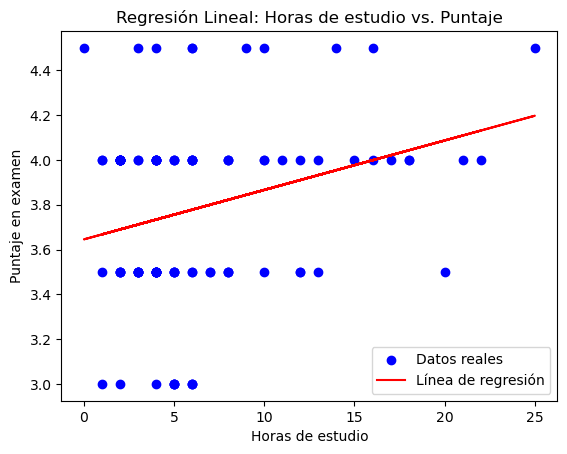

In [1]:
#Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df.head()

# Se decide cual sera nuestra variable independiente (X) y la dependiente (y)

X = df[['horasEstudio']] 
y = df['nota']

# Ya se dividen los datos en conjuntos de entrenamiento y prueba, en este caso 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones

y_pred = model.predict(X_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred) #
r2 = r2_score(y_test, y_pred) #

# Imprimir los datos de evaluacion del modelo:

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Pendiente (m): {model.coef_[0]:.2f}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una grafica: 

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Lineal: Horas de estudio vs. Puntaje')
plt.legend()
plt.show()

### Semestre (X) and Nota(y)

Error cuadrático medio (MSE): 0.23
Coeficiente de determinación (R²): -0.15
Pendiente (m): 0.04
Intersección (b): 3.58


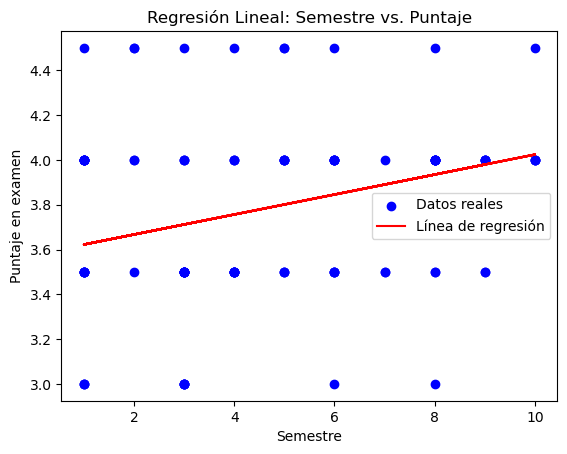

In [8]:
#Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df.head()

# Se decide cual sera nuestra variable independiente (X) y la dependiente (y)

X = df[['semestre']] 
y = df['nota']

# Ya se dividen los datos en conjuntos de entrenamiento y prueba, en este caso 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones

y_pred = model.predict(X_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred) #
r2 = r2_score(y_test, y_pred) #

# Imprimir los datos de evaluacion del modelo:

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Pendiente (m): {model.coef_[0]:.2f}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una grafica: 

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Semestre')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Lineal: Semestre vs. Puntaje')
plt.legend()
plt.show()

### Trabaja (X) and Nota(y)

Error cuadrático medio (MSE): 0.21
Coeficiente de determinación (R²): -0.03
Pendiente (m): -0.00
Intersección (b): 3.79


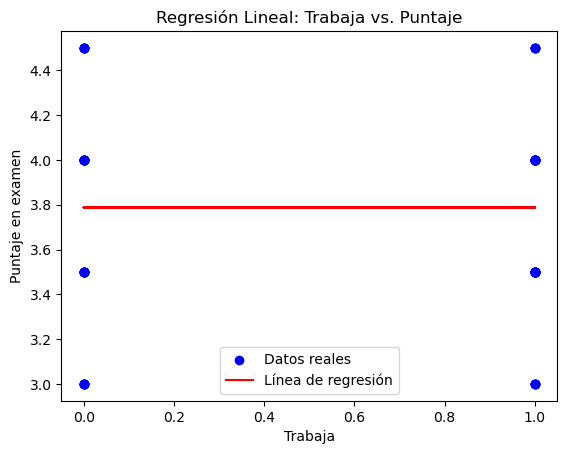

In [4]:
#Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df.head()

# Se decide cual sera nuestra variable independiente (X) y la dependiente (y)

X = df[['trabaja']] 
y = df['nota']

# Ya se dividen los datos en conjuntos de entrenamiento y prueba, en este caso 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones

y_pred = model.predict(X_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred) #
r2 = r2_score(y_test, y_pred) #

# Imprimir los datos de evaluacion del modelo:

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Pendiente (m): {model.coef_[0]:.2f}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una grafica: 

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Trabaja')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Lineal: Trabaja vs. Puntaje')
plt.legend()
plt.show()

### Trabaja (X) and estresAcademico(y)

Error cuadrático medio (MSE): 1.30
Coeficiente de determinación (R²): -0.03
Pendiente (m): -0.06
Intersección (b): 3.33


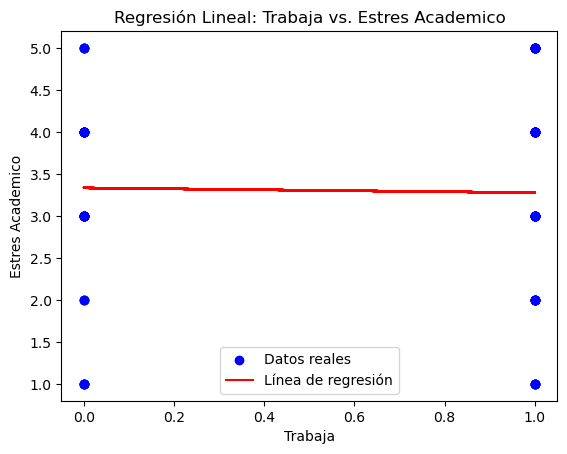

In [5]:
#Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df.head()

# Se decide cual sera nuestra variable independiente (X) y la dependiente (y)

X = df[['trabaja']] 
y = df['estresAcademico']

# Ya se dividen los datos en conjuntos de entrenamiento y prueba, en este caso 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal

model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones

y_pred = model.predict(X_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred) #
r2 = r2_score(y_test, y_pred) #

# Imprimir los datos de evaluacion del modelo:

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Pendiente (m): {model.coef_[0]:.2f}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una grafica: 

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Línea de regresión')
plt.xlabel('Trabaja')
plt.ylabel('Estres Academico')
plt.title('Regresión Lineal: Trabaja vs. Estres Academico')
plt.legend()
plt.show()

# Regresión Polinómica

La regresión lineal polinómica es una extensión de la regresión lineal que permite modelar relaciones no lineales entre las variables independiente (𝑥x) y dependiente (𝑦).

### Horas de Estudios (X) and Nota(y)

Error cuadrático medio (MSE): 0.19
Coeficiente de determinación (R²): 0.06
Coeficiente de la regresión (para cada grado de X): [ 0.00000000e+00 -2.03571771e-01  3.35881698e-02 -1.87222751e-03
  3.50751558e-05]
Intersección (b): 4.07


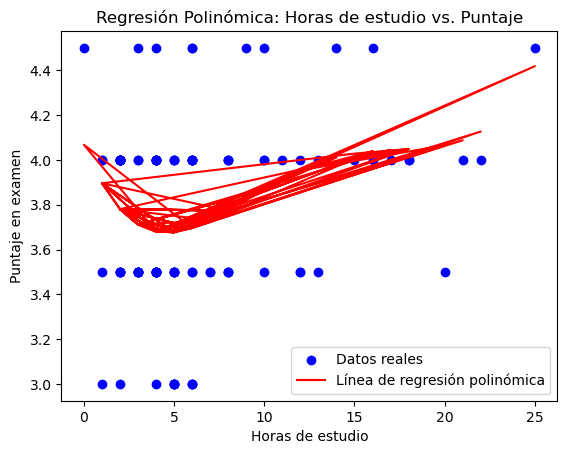

In [12]:
# Importación de la biblioteca a implementar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Se decide cual será nuestra variable independiente (X) y la dependiente (y)
X = df[['horasEstudio']]  # Variable independiente (horas de estudio)
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la transformación polinómica (por ejemplo, grado 4)
poly = PolynomialFeatures(degree=4)  # Grado 4
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_poly_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada grado de X): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una gráfica
plt.scatter(X, y, color='blue', label='Datos reales')  # Datos reales
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Línea de regresión polinómica')  # Predicción
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Polinómica: Horas de estudio vs. Puntaje')
plt.legend()
plt.show()


### Semestre (X) and Nota(y)

Error cuadrático medio (MSE): 0.20
Coeficiente de determinación (R²): 0.03
Coeficiente de la regresión (para cada grado de X): [ 0.00000000e+00  2.52975496e+01 -1.99622270e+01  7.73947638e+00
 -1.63541110e+00  1.92013050e-01 -1.17625718e-02  2.93121478e-04]
Intersección (b): -7.94


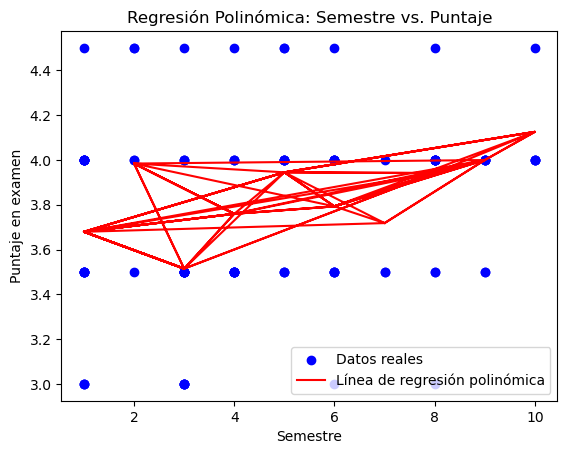

In [ ]:
# Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado

df.head()

# Se decide cual será nuestra variable independiente (X) y la dependiente (y)

X = df[['semestre']]  # Variable independiente (semestre)
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la transformación polinómica (por ejemplo, grado 7)

poly = PolynomialFeatures(degree=7)  # Grado 7
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con las características polinómicas

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Realizar predicciones con el modelo entrenado

y_pred = model.predict(X_poly_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada grado de X): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una gráfica

plt.scatter(X, y, color='blue', label='Datos reales')  # Datos reales
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Línea de regresión polinómica')  # Predicción
plt.xlabel('Semestre')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Polinómica: Semestre vs. Puntaje')
plt.legend()
plt.show()


### Estilo de aprendizaje (X) and Nota(y)

Error cuadrático medio (MSE): 0.22
Coeficiente de determinación (R²): -0.07
Coeficiente de la regresión (para cada grado de X): [ 0.         -0.00412978 -0.00022286  0.0038114   0.00054124]
Intersección (b): 3.75


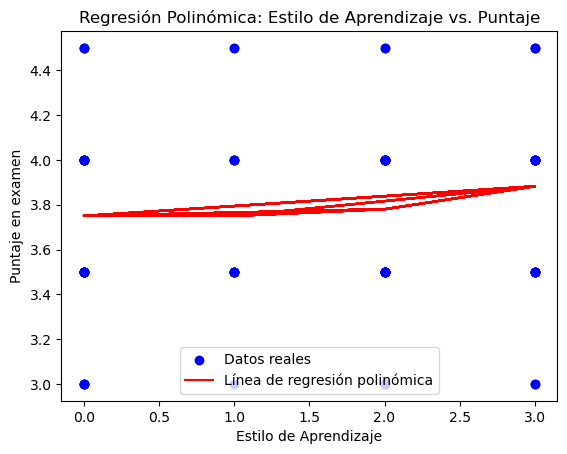

In [19]:
# Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las tecnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado

df.head()

# Se decide cual será nuestra variable independiente (X) y la dependiente (y)

X = df[['estiloAprendizaje']]  # Variable independiente (estiloAprendizaje)
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la transformación polinómica (por ejemplo, grado 4)

poly = PolynomialFeatures(degree=4)  # Grado 4
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con las características polinómicas

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Realizar predicciones con el modelo entrenado

y_pred = model.predict(X_poly_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada grado de X): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados en una gráfica

plt.scatter(X, y, color='blue', label='Datos reales')  # Datos reales
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Línea de regresión polinómica')  # Predicción
plt.xlabel('Estilo de Aprendizaje')
plt.ylabel('Puntaje en examen')
plt.title('Regresión Polinómica: Estilo de Aprendizaje vs. Puntaje')
plt.legend()
plt.show()


# Regresión Múltiple

La regresión múltiple es una extensión de la regresión lineal que permite modelar la relación entre una variable dependiente y varias variables independientes

### Lineal Multiple: horasEstudio, trabaja, asistenciaClases, cursos (X) and nota(y)

In [23]:
# Importación de la biblioteca a implementar
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
# Variables independientes: horasEstudio, trabaja, asistenciaClases, cursos
X = df[['horasEstudio', 'trabaja', 'asistenciaClases', 'cursos']]  # Variables independientes
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba
# En este caso, 0.8 son de entrenamiento y 0.2 de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada variable independiente): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

Error cuadrático medio (MSE): 0.21
Coeficiente de determinación (R²): -0.04
Coeficiente de la regresión (para cada variable independiente): [ 0.02165382  0.01701152 -0.12174302  0.01112078]
Intersección (b): 3.63


### Lineal Multiple: horasEstudio, trabaja, asistenciaClases, cursos (X) and estresAcademico(y)

In [26]:
# Importación de la biblioteca a implementar
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
# Variables independientes: horasEstudio, trabaja, asistenciaClases, cursos
X = df[['horasEstudio', 'trabaja', 'asistenciaClases', 'cursos']]  # Variables independientes
y = df['estresAcademico']  # Variable dependiente (estresAcademico)

# Dividir los datos en conjuntos de entrenamiento y prueba
# En este caso, 0.8 son de entrenamiento y 0.2 de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada variable independiente): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

Error cuadrático medio (MSE): 1.52
Coeficiente de determinación (R²): -0.19
Coeficiente de la regresión (para cada variable independiente): [ 0.01744647 -0.01490424 -0.59957071 -0.02807451]
Intersección (b): 3.58


### Ejemplo 3D con Regresión Múltiple: horasEstudio, trabaja (X) and nota(y)

Error cuadrático medio (MSE): 0.22
Coeficiente de determinación (R²): -0.06
Coeficiente de la regresión (para cada variable independiente): [ 0.02208636 -0.00569997]
Intersección (b): 3.65


c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


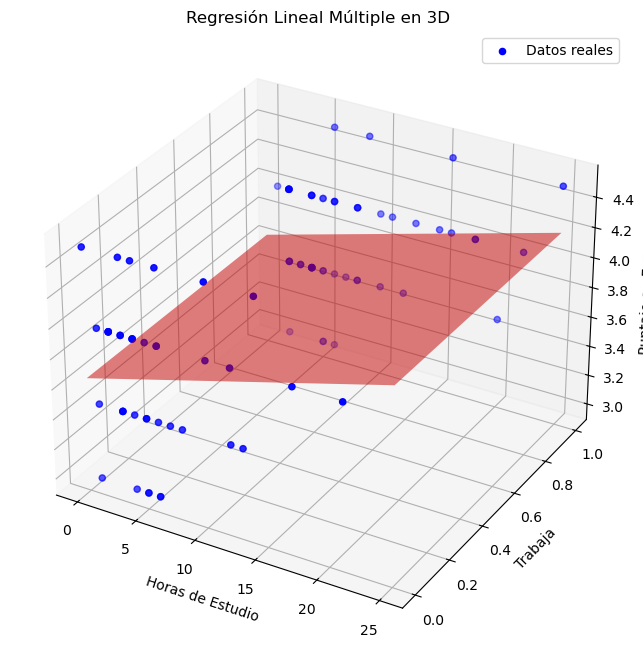

In [24]:
# Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado

df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
# Variables independientes: horasEstudio y trabaja (para graficar en 3D)

X = df[['horasEstudio', 'trabaja']]  # Variables independientes
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba
# En este caso, 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple

model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con el modelo entrenado

y_pred = model.predict(X_test)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión (para cada variable independiente): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Graficar en 3D

# Crear una figura y un eje 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generar una malla de puntos en el espacio 3D

x1_range = np.linspace(X['horasEstudio'].min(), X['horasEstudio'].max(), 100)
x2_range = np.linspace(X['trabaja'].min(), X['trabaja'].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

# Predecir los valores de y en toda la malla

y_grid = model.predict(X_grid).reshape(x1_grid.shape)

# Graficar los puntos de datos originales

ax.scatter(X['horasEstudio'], X['trabaja'], y, color='blue', label='Datos reales')

# Graficar el plano de la regresión

ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, rstride=100, cstride=100)

# Etiquetas y título

ax.set_xlabel('Horas de Estudio')
ax.set_ylabel('Trabaja')
ax.set_zlabel('Puntaje en Examen')
ax.set_title('Regresión Lineal Múltiple en 3D')

# Mostrar la leyenda

ax.legend()

# Mostrar el gráfico

plt.show()


### Regresión Polinómica Múltiple: horasEstudio, trabaja (X) and nota(y)

In [28]:
# Importación de la biblioteca a implementar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
# Variables independientes: horasEstudio y trabaja
X = df[['horasEstudio', 'trabaja']]  # Variables independientes
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba
# En este caso, 0.8 son de entrenamiento y 0.2 de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la transformación polinómica (por ejemplo, grado 2 para la regresión polinómica)
poly = PolynomialFeatures(degree=2)  # Grado 2 para una regresión polinómica de segundo orden
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_poly_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficiente de la regresión polinómica (para cada variable independiente): {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")




Error cuadrático medio (MSE): 0.21
Coeficiente de determinación (R²): -0.05
Coeficiente de la regresión polinómica (para cada variable independiente): [ 0.         -0.01099667 -0.02670661  0.00136197  0.00649212 -0.02670661]
Intersección (b): 3.77


# Escala

El escalado de datos es crucial cuando las características tienen unidades de medida diferentes o varían en magnitud. Si algunas características tienen una escala mucho mayor que otras, el modelo de regresión puede darle más peso a esas características debido a su mayor magnitud. Por ejemplo, si horasEstudio está en una escala de 0 a 100 y asistenciaClases está en una escala de 0 a 1, el modelo podría dar más importancia a horasEstudio simplemente porque tiene una magnitud mayor. El escalado ayuda a equilibrar la influencia de cada característica.

### 'horasEstudio', 'trabaja', 'asistenciaClases' (X) and 'nota' (y)

In [ ]:
# Importación de la biblioteca a implementar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado

df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
# Variables independientes: horasEstudio, trabaja y asistenciaClases

X = df[['horasEstudio', 'trabaja', 'asistenciaClases']]  # Variables independientes
y = df['nota']  # Variable dependiente (nota)

# Dividir los datos en conjuntos de entrenamiento y prueba
# En este caso, 0.8 son de entrenamiento y 0.2 de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar escalado de características usando StandardScaler (Media 0 y Desviación estándar 1)

scaler = StandardScaler()

# Ajustamos el escalador con el conjunto de entrenamiento y transformamos tanto X_train como X_test

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con las características escaladas

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo entrenado

y_pred = model.predict(X_test_scaled)

# Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")



Error cuadrático medio (MSE): 0.22
Coeficiente de determinación (R²): -0.06
Coeficientes de la regresión: [0.11319656]
Intersección (b): 3.79


### 'asistenciaClases', 'cursos' (X) and 'trabaja' (y)

In [34]:
# Importación de las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Se decide cuál será nuestra variable independiente (X) y la dependiente (y)
X = df[['asistenciaClases', 'cursos']]  # Variables independientes: asistenciaClases y cursos
y = df['trabaja']  # Variable dependiente: trabaja

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características: Es importante escalar las variables antes de entrenar el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta el escalador a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Aplica la transformación a los datos de prueba

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")



Error cuadrático medio (MSE): 0.25
Coeficiente de determinación (R²): -0.07
Coeficientes de la regresión: [ 0.0538683  -0.08564509]
Intersección (b): 0.59


X => 'añosEstudiando', 'edad', 'horasEstudio', 'asistenciaClases', 'creditos', 'cursos', 'trabaja', 'actividadesLudicas', 'horasLudicas',
        'estresAcademico', 'horasSueño', 'apoyoU', 'usoIA', 'gruposEstudio', 'estiloAprendizaje'

y => 'nota'

Error cuadrático medio (MSE): 0.34
Coeficiente de determinación (R²): -0.67
Coeficientes de la regresión: [ 0.04059894 -0.07595497  0.13140605 -0.087402    0.0275138   0.04949456
 -0.01829613 -0.10669726  0.06043326 -0.02886617 -0.02391867 -0.1092576
  0.05905274 -0.06777556  0.02499296]
Intersección (b): 3.79


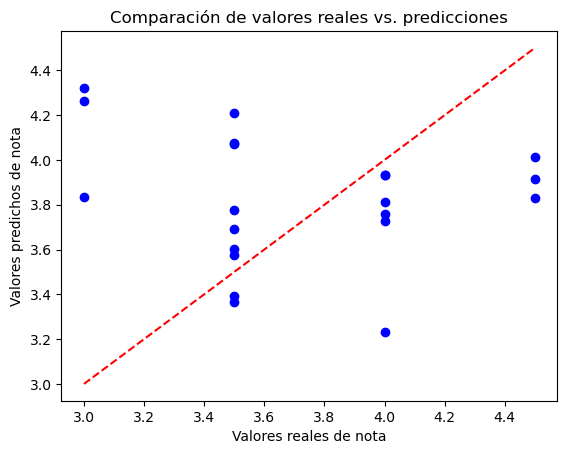

In [49]:
# Importación de las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV ya modificado para poder aplicar las técnicas
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Mostrar las primeras filas del dataset para verificar que está correctamente cargado
df.head()

# Seleccionar las variables que podrían influir en el éxito académico
# Las variables independientes (X) que elegimos para este caso pueden ser todas las que creemos que afectan la nota.
X = df[['añosEstudiando', 'edad', 'horasEstudio', 'asistenciaClases', 'creditos', 
        'cursos', 'trabaja', 'actividadesLudicas', 'horasLudicas', 'estresAcademico',
        'horasSueño', 'apoyoU', 'usoIA', 'gruposEstudio', 'estiloAprendizaje']]  # Variables independientes
y = df['nota']  # Variable dependiente: nota (éxito académico)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características: Es importante escalar las variables antes de entrenar el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta el escalador a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Aplica la transformación a los datos de prueba

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R²

# Imprimir los datos de evaluación del modelo
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Coeficientes de la regresión: {model.coef_}")
print(f"Intersección (b): {model.intercept_:.2f}")

# Visualizar los resultados (en este caso no podemos graficar directamente en 2D debido a las múltiples variables, pero lo mostramos por separado)
# Graficar la comparación entre los valores reales y los predicciones
plt.scatter(y_test, y_pred, color='blue')  # Los puntos reales vs. predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Valores reales de nota')
plt.ylabel('Valores predichos de nota')
plt.title('Comparación de valores reales vs. predicciones')
plt.show()


# Entrenamiento/prueba

### La idea es dividir los datos en dos subconjuntos:

1. Conjunto de Entrenamiento:
Propósito: Este subconjunto de los datos se utiliza para "entrenar" el modelo. El modelo ajusta sus parámetros a los datos de entrenamiento, aprendiendo las relaciones entre las variables independientes (entradas) y la variable dependiente (salida).

    Proceso: Durante el entrenamiento, el modelo observa los datos y ajusta sus parámetros (como los coeficientes en una regresión lineal) para minimizar el error entre las predicciones y los valores reales.

    Ejemplo: Si tienes un conjunto de datos de estudiantes, donde tienes variables como "horas de estudio" y "asistencia a clases", el conjunto de entrenamiento ayudará a que el modelo aprenda a predecir la "nota" de los estudiantes en función de esas variables.

2. Conjunto de Prueba:
Propósito: Después de entrenar el modelo con los datos de entrenamiento, se evalúa su rendimiento utilizando el conjunto de prueba. Este conjunto contiene datos que no se usaron durante el entrenamiento, lo que permite medir cuán bien el modelo generaliza a datos nuevos (no vistos anteriormente).

    Evaluación: Al comparar las predicciones del modelo con los valores reales en el conjunto de prueba, puedes obtener métricas de rendimiento como el Error Cuadrático Medio (MSE), el Coeficiente de Determinación R², o el Error Absoluto Medio (MAE). Estas métricas indican qué tan preciso es el modelo al predecir nuevos datos.

    Ejemplo: Si el conjunto de prueba contiene datos de nuevos estudiantes (con las mismas características: "horas de estudio" y "asistencia a clases"), el modelo predice las "notas" para esos estudiantes. Luego, se comparan esas predicciones con las notas reales para ver qué tan bien funcionó el modelo.

#### ¿Por qué dividir los datos?
El objetivo de dividir los datos en entrenamiento y prueba es evaluar la capacidad del modelo para generalizar, es decir, qué tan bien puede hacer predicciones sobre datos nuevos (aquellos que no ha visto durante el entrenamiento). Si el modelo funciona muy bien en el conjunto de entrenamiento pero mal en el conjunto de prueba, es probable que el modelo esté sobreajustado (overfitted). Esto significa que el modelo ha aprendido demasiado bien los detalles del conjunto de entrenamiento, incluyendo el ruido y los detalles específicos que no se aplican a datos nuevos.

### ¿Cómo se hace la división?
Generalmente, los datos se dividen en un 80% para entrenamiento y un 20% para prueba, aunque esta proporción puede variar dependiendo del tamaño del conjunto de datos y el tipo de problema.

### Ejemplo Visual:
Imagina que tienes 1000 datos:

Entrenamiento (80%): 800 datos se utilizan para ajustar el modelo.
Prueba (20%): 200 datos se usan para evaluar qué tan bien funciona el modelo con datos nuevos.

# Matriz de confusión


La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. Se utiliza principalmente para medir la exactitud de las predicciones, y proporciona información detallada sobre cómo un modelo ha clasificado las instancias en cada clase.

Se categoriza la variable nota en dos clases (Aprobado, Excelente) y luego se entrena un modelo de clasificación multiclase usando ***Regresión Logística*** . También se calcula y muestra la matriz de confusión, la exactitud y el reporte de clasificación.

In [51]:
# Importación de librerías necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar el dataset

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Dividir la columna 'nota' en categorías
# Definir las condiciones para las dos categorías

condiciones = [
    (df['nota'] > 2.9) & (df['nota'] <= 3.9),  # Aprobado
    (df['nota'] > 3.9)  # Excelente
]

# Definir los valores que tomarán las categorías

categorias = ['Aprobado', 'Excelente']

# Crear la nueva columna 'nota_categoria' con las categorías correspondientes

df['nota_categoria'] = np.select(condiciones, categorias, default='Desconocido')

# Variables independientes (X)

X = df[['añosEstudiando', 'edad', 'horasEstudio', 'asistenciaClases', 'creditos', 
        'cursos', 'trabaja', 'actividadesLudicas', 'horasLudicas', 'estresAcademico',
        'horasSueño', 'apoyoU', 'usoIA', 'gruposEstudio', 'estiloAprendizaje']]

# Variable dependiente (y) ahora es 'nota_categoria'

y = df['nota_categoria']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento y 20% prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (esto es necesario para la regresión logística)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística (multinomial)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Entrenar el modelo con los datos de entrenamiento

model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba

y_pred = model.predict(X_test_scaled)

# Generar la matriz de confusión

cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión

print("Matriz de Confusión:")
print(cm)

# Calcular la exactitud

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[3 9]
 [1 8]]
Exactitud del modelo: 0.52
Reporte de Clasificación:
              precision    recall  f1-score   support

    Aprobado       0.75      0.25      0.38        12
   Excelente       0.47      0.89      0.62         9

    accuracy                           0.52        21
   macro avg       0.61      0.57      0.50        21
weighted avg       0.63      0.52      0.48        21



### Matriz
Esto se interpreta de la siguiente manera:

***Primera fila (Aprobado):***

3 predicciones correctas de "Aprobado".

9 predicciones incorrectas de "Aprobado" que fueron clasificadas como "Excelente".

***Segunda fila (Excelente):***

1 predicción incorrecta de "Excelente" que fue clasificada como "Aprobado".

8 predicciones correctas de "Excelente".

### Exactitud

La exactitud del modelo es el porcentaje de predicciones correctas en relación con el total de predicciones. En nuestro caso:
el modelo acertó en el 52% de las predicciones

### Reporte de Clasificación

***Precisión (Precision):***

Es la proporción de predicciones correctas para una clase en relación con todas las predicciones hechas para esa clase.

Aprobado: La precisión es 0.75, lo que significa que el 75% de las veces que el modelo predijo "Aprobado", fue correcto.

Excelente: La precisión es 0.47, lo que significa que el 47% de las veces que el modelo predijo "Excelente", fue correcto.



***Recall:***

Es la proporción de predicciones correctas para una clase en relación con todas las instancias reales de esa clase.

Aprobado: El recall es 0.25, lo que significa que el modelo solo predijo correctamente el 25% de los casos reales de "Aprobado".

Excelente: El recall es 0.89, lo que significa que el modelo predijo correctamente el 89% de los casos reales de "Excelente".


***F1-Score:***

Es una métrica que combina precisión y recall en una sola cifra, equilibrando ambos. Es útil cuando tienes un desbalance entre las clases.

Aprobado: El F1-score es 0.38, lo que indica un rendimiento moderado para esta clase.

Excelente: El F1-score es 0.62, lo que indica un mejor rendimiento para esta clase.

### Promedios:

El macro promedio y el weighted average te dan una visión general del rendimiento del modelo:

***Macro promedio:*** Es el promedio de las métricas (precisión, recall y F1-score) entre todas las clases, sin tener en cuenta el número de ejemplos en cada clase.

Precision: 0.61

Recall: 0.57

F1-score: 0.50

***Promedio ponderado (weighted average):*** Este promedio toma en cuenta la cantidad de ejemplos de cada clase.

Precision: 0.63

Recall: 0.52

F1-score: 0.48

***¿Qué significa todo esto?***

El modelo tiene una exactitud moderada del 52%, lo que indica que podría mejorar.

El rendimiento es mucho mejor para la clase "Excelente", donde tiene un recall y F1-score más altos (esto significa que puede identificar correctamente los estudiantes "Excelentes" en su mayoría).

Para la clase "Aprobado", el modelo tiene un bajo recall (solo 25%), lo que significa que no está clasificando correctamente muchos de los estudiantes que realmente deberían ser "Aprobados".

# Agrupación jerárquica

La Agrupación Jerárquica es una técnica de clustering no supervisado que permite agrupar elementos de manera jerárquica. Hay dos tipos principales de agrupamiento jerárquico:

***Agglomerative (agregativo):*** Empieza con cada punto como su propio clúster y luego fusiona los clústeres más cercanos en cada paso.

***Divisive (divisivo):*** Comienza con todos los puntos en un solo clúster y luego divide los clústeres hasta obtener el número deseado.

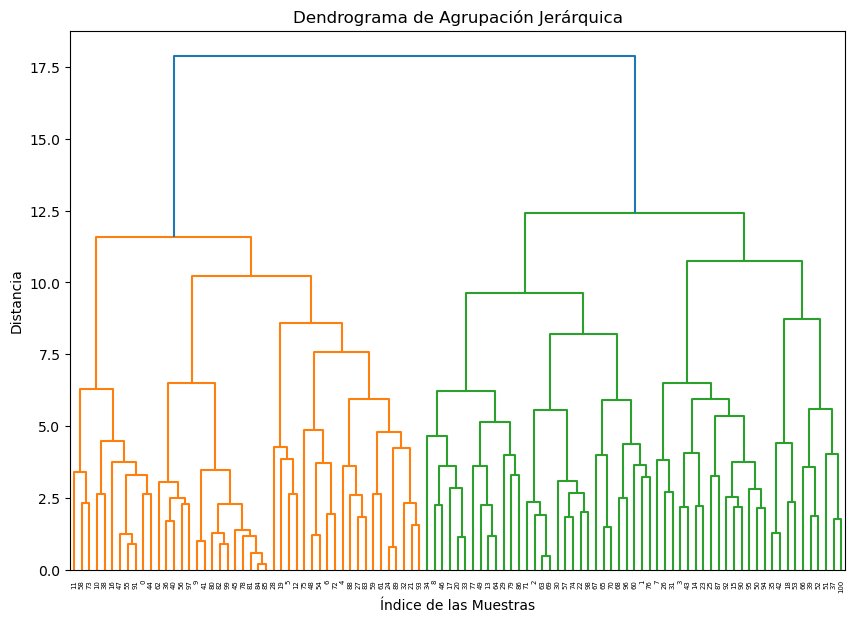

   añosEstudiando  edad  genero  programaAcademico  semestre  horasEstudio  \
0               5     0       0                  0         9             3   
1               5     0       0                  0         6             5   
2              10     2       0                  0         5             2   
3               5     1       1                  0         5             6   
4               5     1       0                  0         6             4   
5               3     1       1                  3         5            16   
6               5     2       0                  1         8            12   
7               5     1       1                  1         6            14   
8               3     0       1                  1         4            10   
9               1     0       1                  1         1             5   

   asistenciaClases  creditos  cursos  trabaja  actividadesLudicas  \
0                 1        13      10        1                   0   
1

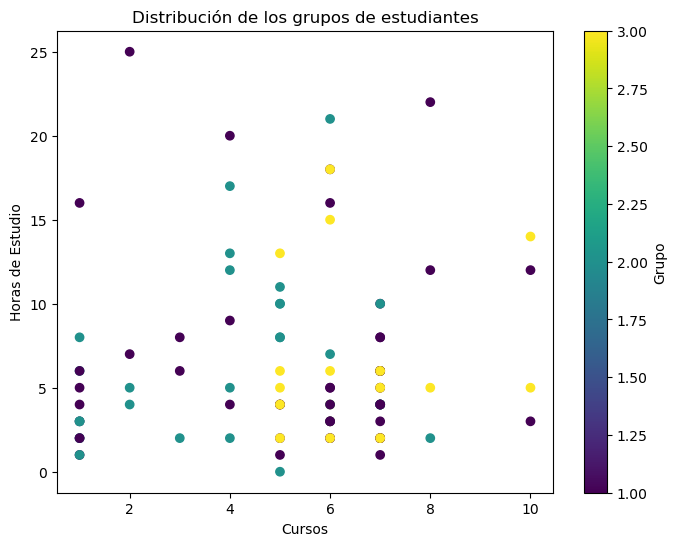

In [55]:
# Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Cargar el dataset

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Seleccionar las características relevantes para el clustering

X = df[['horasEstudio', 'asistenciaClases', 'cursos', 'trabaja', 'actividadesLudicas', 'horasLudicas', 'estresAcademico',
        'horasSueño', 'usoIA', 'gruposEstudio', 'estiloAprendizaje']]

# Normalizar las características

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar la agrupación jerárquica usando el método 'ward' (minimiza la varianza dentro de los clústeres)

Z = linkage(X_scaled, method='ward')

# Visualizar el dendrograma

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Agrupación Jerárquica')
plt.xlabel('Índice de las Muestras')
plt.ylabel('Distancia')
plt.show()

# Aplicar el corte del dendrograma para obtener los grupos
# Supongamos que queremos 3 clústeres (por ejemplo, bajo, medio y alto rendimiento)

clusters = fcluster(Z, t=3, criterion='maxclust')

# Agregar los grupos al DataFrame original

df['grupo'] = clusters

# Mostrar los primeros 10 registros con la asignación de grupo

print(df.head(10))

# Mostrar la distribución de los grupos

print("Distribución de los grupos:")
print(df['grupo'].value_counts())

# Opcional: Visualización de los grupos en 2D para ver cómo se distribuyen

plt.figure(figsize=(8, 6))
plt.scatter(df['cursos'], df['horasEstudio'], c=df['grupo'], cmap='viridis')
plt.title('Distribución de los grupos de estudiantes')
plt.xlabel('Cursos')
plt.ylabel('Horas de Estudio')
plt.colorbar(label='Grupo')
plt.show()


# Regresión logística

In [57]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar el dataset 
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Transformar la columna 'nota' en dos categorías: 'Aprobado' y 'Excelente'
df['nota_categoria'] = np.where(df['nota'] < 3.9, 'Aprobado', 'Excelente')

# Variables independientes (X) y dependiente (y)

X = df[['trabaja', 'cursos', 'estresAcademico']]

y = df['nota_categoria']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento y 20% prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística

model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento

model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre los datos de prueba

y_pred = model.predict(X_test_scaled)

# Calcular la exactitud del modelo

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# # Mostrar la matriz de confusión

# print("Matriz de Confusión:")
# print(confusion_matrix(y_test, y_pred))

# # Mostrar el reporte de clasificación
# print("Reporte de Clasificación:")
# print(classification_report(y_test, y_pred))

# Visualización de los coeficientes del modelo (para interpretar el impacto de cada variable)
print("Coeficientes del modelo:")
print(f"Coeficiente de 'trabaja': {model.coef_[0][0]:.4f}")
print(f"Coeficiente de 'clases': {model.coef_[0][1]:.4f}")
print(f"Coeficiente de 'estresAcademico': {model.coef_[0][2]:.4f}")


Exactitud del modelo: 0.48
Coeficientes del modelo:
Coeficiente de 'trabaja': 0.0229
Coeficiente de 'clases': 0.1951
Coeficiente de 'estresAcademico': -0.2316


# K-means

K-Means es una técnica de clustering (agrupamiento) utilizada en aprendizaje no supervisado, donde el objetivo es dividir un conjunto de datos en k grupos (clusters) basándose en sus características. Los datos dentro de un mismo grupo tienen propiedades similares, mientras que los datos en grupos diferentes son lo más distintos posible.

### K-Means se usa principalmente para:

***Segmentación de datos:*** Agrupar clientes según comportamientos de compra, clasificar documentos, dividir imágenes en regiones, etc.

***Análisis exploratorio:*** Identificar patrones ocultos o relaciones en los datos.

***Compresión de datos:*** Reducir datos a representaciones más simples, como en la compresión de imágenes.

***Inicialización en otros modelos:*** Sirve como un paso previo para otros algoritmos, como el clustering jerárquico.

### Resultados de K-Means

##### El algoritmo produce:

***Centroides:*** Los puntos centrales de cada cluster. Representan el "promedio" de las observaciones dentro de cada grupo.

***Asignación de Clusters:*** Cada dato queda asignado a un cluster específico.

***Inercia (SSE - Suma de los Errores Cuadráticos):*** Mide la variación dentro de los clusters: es la suma de las distancias al cuadrado entre cada punto y su centroide. Valores menores indican clusters más compactos.

c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

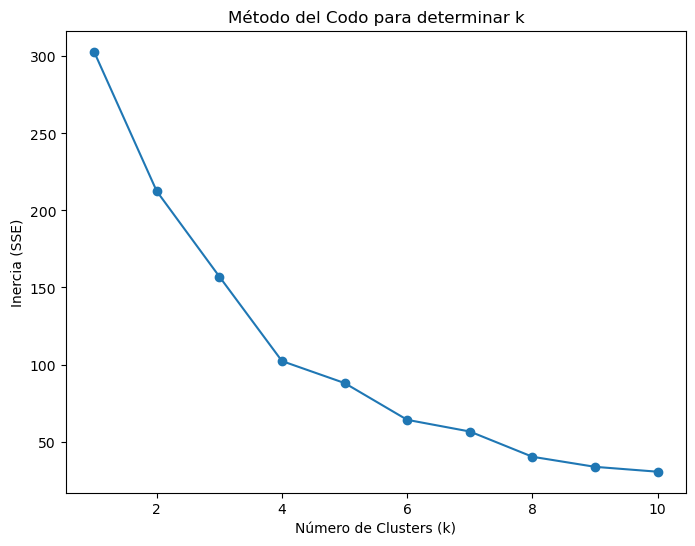

c:\Users\Andres Mendez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


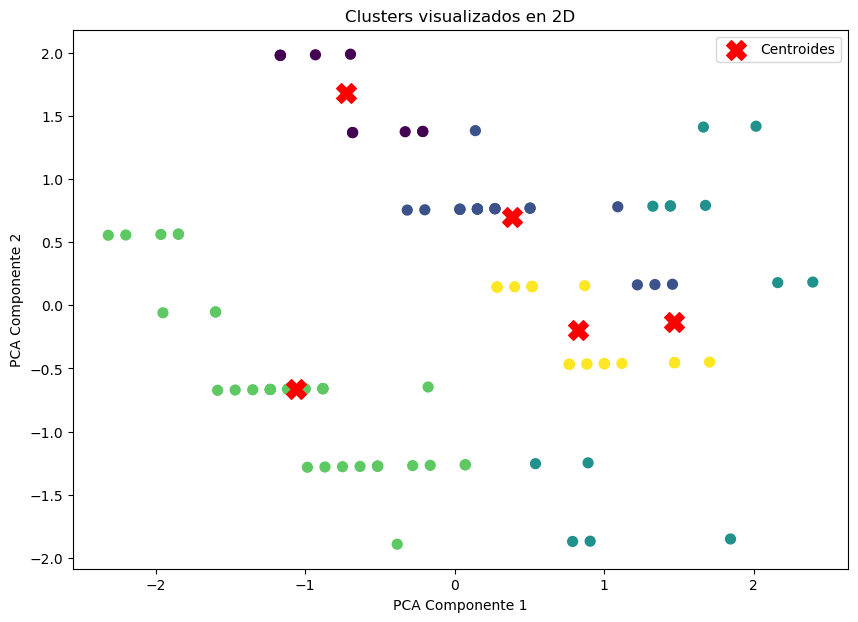

   estresAcademico  horasEstudio  trabaja  Cluster
0                5             3        1        4
1                3             5        1        1
2                4             2        1        4
3                3             6        0        3
4                4             4        1        4
5                3            16        1        2
6                4            12        1        1
7                4            14        0        2
8                4            10        0        3
9                4             5        0        3

Resumen por cluster:
         estresAcademico  horasEstudio   trabaja
Cluster                                         
0               1.500000      3.700000  1.000000
1               3.105263      6.526316  1.000000
2               3.615385     17.461538  0.615385
3               3.000000      4.472222  0.000000
4               4.565217      4.304348  1.000000


In [2]:
# Importación de librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el dataset

df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Seleccionar las columnas relevantes para el clustering

X = df[['estresAcademico', 'horasEstudio', 'trabaja']]

# Escalar las características para normalizar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters usando el método del codo (10)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para determinar k')
plt.show()

# Basándonos en el gráfico, seleccionamos k=5 (puedes ajustar según el resultado)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Agregar la asignación de clusters al dataframe original

df['Cluster'] = y_kmeans

# Visualizar los centroides y los clusters en un gráfico 2D con reducción de dimensiones (PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.title('Clusters visualizados en 2D')
plt.legend()
plt.show()

# Mostrar el dataframe con los clusters asignados

print(df[['estresAcademico', 'horasEstudio', 'trabaja', 'Cluster']].head(10))

# Interpretar los clusters calculando promedios por grupo

cluster_summary = df.groupby('Cluster')[['estresAcademico', 'horasEstudio', 'trabaja']].mean()
print("\nResumen por cluster:")
print(cluster_summary)


# Agregación Bootstrap

La técnica de bootstrap aggregation o bagging (agrupación por bootstrap) es un enfoque de aprendizaje de máquina que combina múltiples modelos para mejorar la precisión y reducir la varianza del modelo. Esto se logra al entrenar modelos independientes en subconjuntos aleatorios del dataset (con reemplazo) y luego promediar sus predicciones (en problemas de regresión) o aplicar votación mayoritaria (en problemas de clasificación).

In [5]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Cargar el dataset
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

df['nota_categoria'] = np.where(df['nota'] < 3.9, 'Aprobado', 'Excelente')

# Seleccionar características y la variable objetivo
X = df[['estresAcademico', 'horasEstudio', 'trabaja']]  # Variables independientes
y = df['nota_categoria']  # Variable dependiente (ya categorizada como 'Aprobado' y 'Excelente')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo base (Árbol de Decisión)
base_model = DecisionTreeClassifier(random_state=42)

# Crear el modelo BaggingClassifier con el modelo base
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# Entrenar el modelo Bagging
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nExactitud del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[6 6]
 [3 6]]

Exactitud del modelo:
0.5714285714285714

Reporte de Clasificación:
              precision    recall  f1-score   support

    Aprobado       0.67      0.50      0.57        12
   Excelente       0.50      0.67      0.57         9

    accuracy                           0.57        21
   macro avg       0.58      0.58      0.57        21
weighted avg       0.60      0.57      0.57        21



##### Matriz de Confusión

***Interpretación:***

6 (fila 1, columna 1): El modelo predijo correctamente 6 estudiantes como "Aprobado".

6 (fila 1, columna 2): El modelo clasificó incorrectamente 6 estudiantes como "Excelente", cuando realmente eran "Aprobado".

3 (fila 2, columna 1): El modelo clasificó incorrectamente 3 estudiantes como "Aprobado", cuando realmente eran "Excelente".

6 (fila 2, columna 2): El modelo predijo correctamente 6 estudiantes como "Excelente".

##### Exactitud del Modelo

***Exactitud: 0.5714285714285714 ≈ 57%***

Significa que el modelo clasifica correctamente el 57% de las observaciones del conjunto de prueba.

Aunque no es una exactitud alta, es un resultado razonable para un modelo básico como Bagging con un conjunto pequeño de datos.


##### Reporte de Clasificación

Este reporte muestra las métricas clave para evaluar el rendimiento del modelo en cada clase:

***1. Clase "Aprobado"***

Precisión (Precision): 0.67

El 67% de los casos que el modelo predijo como "Aprobado" son realmente "Aprobado".

Exhaustividad (Recall): 0.50

El modelo identificó correctamente el 50% de los estudiantes que realmente eran "Aprobado".

F1-score: 0.57

Es una combinación de precisión y exhaustividad. Indica un equilibrio razonable entre ambos para esta clase.

***2. Clase "Excelente"***

Precisión (Precision): 0.50

El 50% de los casos que el modelo predijo como "Excelente" son realmente "Excelente".

Exhaustividad (Recall): 0.67

El modelo identificó correctamente el 67% de los estudiantes que realmente eran "Excelente".

F1-score: 0.57

Similar a la clase "Aprobado", muestra un equilibrio moderado entre precisión y exhaustividad.

#####  Interpretación General
***Rendimiento global:***

El modelo tiene un desempeño equilibrado para ambas clases, con métricas similares en "Aprobado" y "Excelente".
Sin embargo, el modelo tiene una exactitud limitada del 57%, lo que sugiere que podría mejorarse, quizás con: Más datos.
Selección de características más relevantes.
Otros modelos más avanzados como Random Forest o Gradient Boosting.

***Errores comunes:***

El modelo tiene problemas para diferenciar entre "Aprobado" y "Excelente", ya que confunde ambas clases en un número considerable de casos (6 y 3 errores respectivamente en la matriz de confusión).

# Máquina de vectores soporte

Las Máquinas de Vectores de Soporte son algoritmos supervisados de clasificación que buscan encontrar el hiperplano óptimo que separa las clases en el espacio de características.

***Ventajas:***

Eficiente en espacios de alta dimensionalidad.
Robusto frente a outliers mediante la maximización del margen.
Resultados esperados: Un modelo SVM intentará separar las clases de manera óptima. Al analizar métricas como precisión, exhaustividad y f1-score, se evalúa cómo el modelo clasifica correctamente las observaciones.

In [6]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar el dataset
df = pd.read_csv('Datasets/trabajofinal_modificado.csv')

# Crear la columna 'nota_categoria' basada en las reglas dadas (< 3.9: Aprobado, >= 4: Excelente)
condiciones = [
    (df['nota'] <= 3.9),  # Aprobado
    (df['nota'] > 3.9)    # Excelente
]
categorias = ['Aprobado', 'Excelente']
df['nota_categoria'] = np.select(condiciones, categorias)

# Variables independientes (X) y dependiente (y)
X = df[['añosEstudiando', 'edad', 'horasEstudio', 'asistenciaClases', 'creditos', 
        'cursos', 'trabaja', 'actividadesLudicas', 'horasLudicas', 'estresAcademico',
        'horasSueño', 'apoyoU', 'usoIA', 'gruposEstudio', 'estiloAprendizaje']]
y = df['nota_categoria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test_scaled)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[3 9]
 [1 8]]
Exactitud del modelo: 0.52
Reporte de Clasificación:
              precision    recall  f1-score   support

    Aprobado       0.75      0.25      0.38        12
   Excelente       0.47      0.89      0.62         9

    accuracy                           0.52        21
   macro avg       0.61      0.57      0.50        21
weighted avg       0.63      0.52      0.48        21



#### Análisis del desempeño

***Debilidades:***

El modelo no está clasificando bien la clase "Aprobado", como lo demuestra el recall bajo (0.25). Esto implica que la mayoría de las observaciones reales de "Aprobado" se clasifican incorrectamente como "Excelente".

La exactitud general (52%) es apenas mejor que una clasificación aleatoria, lo cual indica que el modelo necesita mejoras.

***Fortalezas:***

La clase "Excelente" tiene un buen recall (0.89), lo que significa que el modelo identifica correctamente la mayoría de las instancias reales de esta clase.